## 1. Gráfico de Superfície 3D (3D Surface Plot)

**Descrição**

O Gráfico de Superfície 3D é uma representação tridimensional que desenha uma superfície conectando pontos de dados. Ele é ideal para visualizar como uma variável (representada no eixo Z, a altura) varia em função de outras duas variáveis independentes (representadas nos eixos X e Y).

---

**Onde pode ser aplicado?**

Este tipo de gráfico é muito utilizado em campos científicos e de engenharia para:
* Mapeamento topográfico, mostrando a altitude (Z) em relação à latitude (X) e longitude (Y).
* Visualização de funções matemáticas complexas.
* Análise de dados de sensores, como a distribuição de temperatura (Z) sobre uma placa de metal (X e Y).
* Em análise de dados, como no nosso exemplo, para ver a frequência de um evento (acidentes) em função de duas variáveis de tempo (dia da semana e hora).

---

**Que tipo de informação pode ser extraída?**

A partir de um gráfico de superfície, podemos extrair:
* **Picos e Vales:** Identificar rapidamente os pontos de máximo (picos) e mínimo (vales) na superfície dos dados.
* **Padrões e Tendências:** Entender como as três variáveis se relacionam. Por exemplo, podemos ver se a frequência de acidentes aumenta consistentemente em um horário específico, independentemente do dia.
* **A "Forma" dos Dados:** Ter uma intuição visual da distribuição geral dos dados no espaço tridimensional.

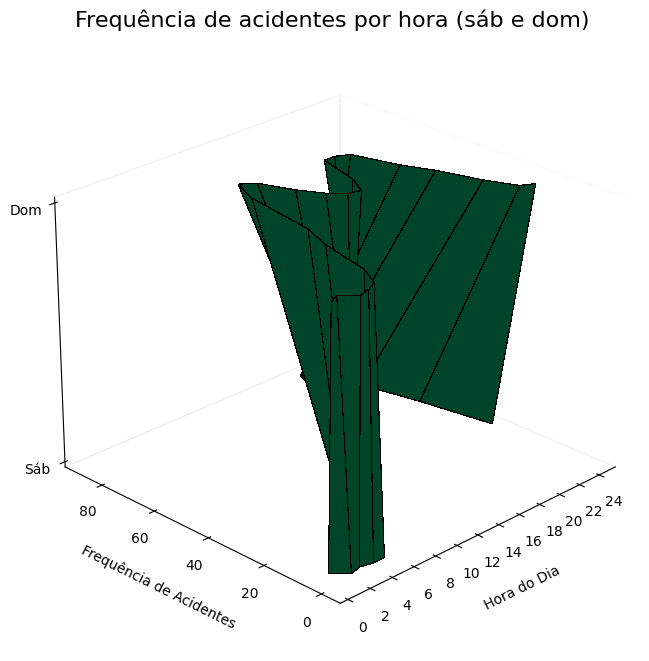

In [1]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Eixo X: Horas de 1 a 24
horas = np.arange(1, 25)

# Eixo Z: Frequência de acidentes para Sábado e Domingo
freq_sabado = np.array([5, 2, 1, 2, 4, 8, 15, 25, 30, 28, 25, 35, 40, 45, 50, 48, 55, 60, 75, 85, 90, 70, 50, 30]) + np.random.randint(-5, 5, 24)
freq_domingo = np.array([8, 4, 2, 3, 6, 12, 25, 40, 60, 75, 70, 60, 55, 50, 48, 55, 65, 70, 68, 55, 40, 30, 20, 15]) + np.random.randint(-5, 5, 24)

# Garante que não há valores negativos
freq_sabado[freq_sabado < 0] = 0
freq_domingo[freq_domingo < 0] = 0

# Eixo Y: Dias da semana (0 para Sábado, 1 para Domingo)
dias_idx = np.array([0, 1])

# Preparação dos Dados para o Gráfico 3D
X, Y = np.meshgrid(horas, dias_idx)
Z = np.array([freq_sabado, freq_domingo])

# Criação e Customização do Gráfico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
surf = ax.plot_surface(X, Z, Y, cmap='YlGn_r', rstride=1, cstride=1, antialiased=False, edgecolor='black', linewidth=0.1)

# Título e Rótulos
ax.set_title('Frequência de acidentes por hora (sáb e dom)', fontsize=16)
ax.set_xlabel('Hora do Dia', labelpad=10)
ax.set_zlabel('Dia da semana', labelpad=10)
ax.set_ylabel('Frequência de Acidentes', labelpad=10)

# Ajustar os marcadores dos eixos
ax.set_xticks(np.arange(0, 25, 2))
ax.set_zticks([0, 1])
ax.set_zticklabels(['Sáb', 'Dom'])

# Ajustar o ângulo de visão
ax.view_init(elev=25, azim=-135)

# Estilo visual
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Mostrar o gráfico
plt.show()

## 2. Gráfico de Linha 

**Descrição**

O gráfico de linha é ideal para representar dados contínuos ou dados com muitos pontos ao longo do tempo. Ele conecta pontos de dados individuais com uma linha, tornando fácil visualizar tendências, padrões e flutuações. Por exemplo, o gráfico de referência destaca o aumento nas buscas por palavras-chave “trabalho remoto” nos EUA durante a pandemia.

---

**Quando usar gráficos de linha?**

* Para comparar e apresentar muitos dados de uma vez.
* Para mostrar tendências ou progresso ao longo do tempo.
* Para destacar aceleração ou desaceleração em uma série de dados.
* Para apresentar dados de previsão e compartilhar a incerteza.

---

**Melhores práticas para gráficos de linha**

* **Use linhas contínuas:** Linhas pontilhadas ou tracejadas podem ser distrativas.
* **Ordene os pontos de forma consistente:** Geralmente por tempo ou outra variável contínua.
* **Rotule as linhas diretamente:** Se houver mais de uma linha, é preferível rotulá-las diretamente em vez de usar uma legenda separada.
* **Não exagere no número de linhas:** Tente não representar mais de quatro linhas para evitar poluição visual.
* **Linha de base em zero:** Não é estritamente necessária como em gráficos de barra, mas é recomendada para evitar distorções na percepção da magnitude das mudanças.

> **Dica profissional de Mike Cisneros (visualizador de dados):**
> **(site piktochart.com)**
> “A faixa do seu menor valor para o seu maior valor deve ocupar cerca de 70 a 80 por cento do espaço vertical disponível no seu gráfico.”

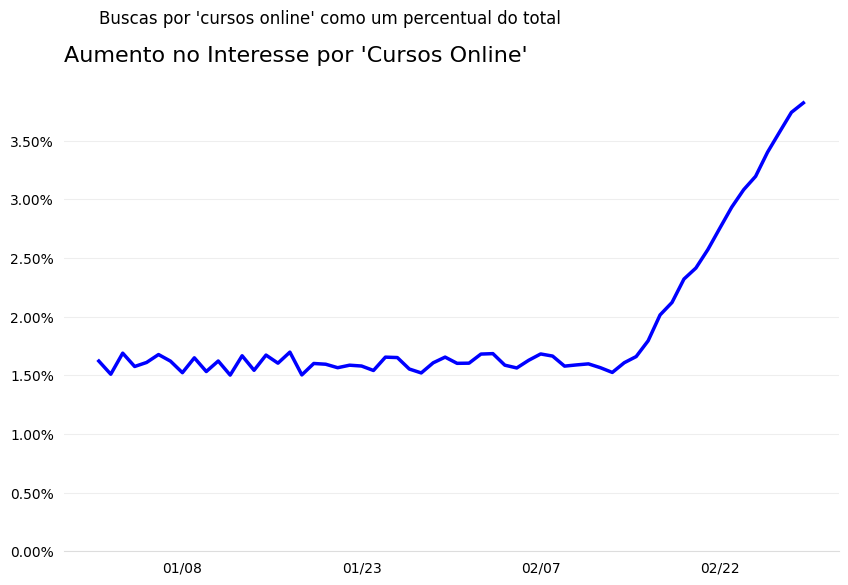

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter

# Criando uma série de datas para o eixo X
datas = pd.date_range(start='2025-01-01', periods=60, freq='D')

# Criando dados para o eixo Y que imitam o padrão: estável e depois um surto de crescimento
periodo_estavel = 1.5 + np.random.rand(45) * 0.2
periodo_crescimento = periodo_estavel[-1] + np.linspace(0, 2.2, 15) + np.random.rand(15) * 0.1 #
interesse = np.concatenate([periodo_estavel, periodo_crescimento]) / 100 

# Criação do Gráfico ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar os dados
ax.plot(datas, interesse, color='blue', linewidth=2.5)

# Título e subtítulo
ax.set_title("Aumento no Interesse por 'Cursos Online'", fontsize=16, loc='left', pad=20)
ax.text(x=datas[0], y=0.045, s="Buscas por 'cursos online' como um percentual do total", fontsize=12)

# Formatar o eixo Y para mostrar porcentagens
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylim(0) # Iniciar eixo Y em 0, como recomendado

# Formatar o eixo X para mostrar as datas de forma clara
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15)) # Marcadores a cada 15 dias
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Remover as bordas do gráfico para um visual mais limpo
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Ajustar os ticks
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# Mostrar o gráfico
plt.show()

### Análise do Exemplo

Este gráfico de linha demonstra uma variação simulada no interesse por "cursos online" ao longo de 60 dias. A visualização cumpre bem seu papel de mostrar tendências ao longo do tempo.

Inicialmente, a tendência é estável, com o interesse flutuando em torno de 1.5%. A partir do final de fevereiro, o gráfico exibe uma inflexão clara e um aumento acentuado e contínuo, com o interesse ultrapassando 3.5% no final do período.

Esta forma de visualização é extremamente eficaz para destacar uma mudança súbita de comportamento, mostrando não apenas a tendência geral, mas também o momento aproximado em que a mudança começou e a sua magnitude.

## 3. Gráfico de Dispersão (Scatter Plot)

**Descrição**

Um gráfico de dispersão ajuda a mostrar a relação entre itens com base em duas variáveis diferentes. Os pontos são plotados em um sistema de coordenadas x-y para representar cada par de valores. Em muitos casos, uma linha de tendência (ou linha de regressão) é adicionada para evidenciar a força e a direção da correlação entre as variáveis.

---

**Quando usar um gráfico de dispersão?**

* Para visualizar e confirmar se existe uma relação (correlação) entre duas variáveis.
* Quando se tem duas variáveis de dados que se complementam e se deseja entender como uma se comporta quando a outra muda.
* Para identificar padrões, agrupamentos (clusters) e pontos fora da curva (outliers) nos dados.

---

**Melhores práticas para gráficos de dispersão**

* **Comece o eixo Y em zero:** Isso ajuda a representar os dados com mais precisão e evita distorções.
* **Use tamanho e cor:** É possível plotar variáveis adicionais alterando o tamanho e a cor dos pontos para enriquecer a análise.
* **Destaque com anotações:** Use cores ou textos para destacar pontos ou grupos de interesse.

> **Dica profissional de Mike Yi (Chartio):**
> **(site piktochart.com)**
> “Adicione uma linha de tendência ao seu gráfico de dispersão se desejar indicar o quão forte é a relação entre as duas variáveis e se há pontos incomuns que afetam o cálculo da linha de tendência.”

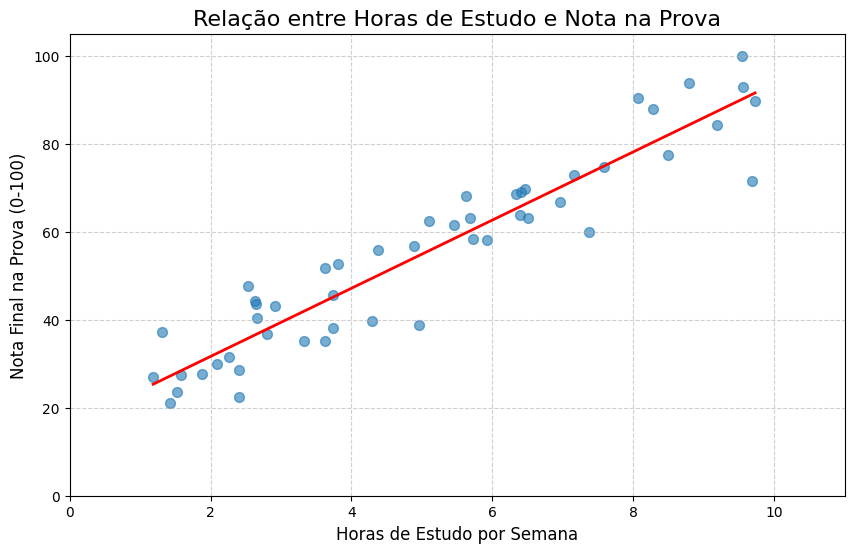

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Simulação de correlação positiva entre horas de estudo e a nota em uma prova.
np.random.seed(42)
num_alunos = 50

# Horas de estudo: um valor aleatório entre 1 e 10
horas_estudo = np.random.rand(num_alunos) * 9 + 1

# Nota na prova: baseada nas horas de estudo + um pouco de variação aleatória (ruído)
# Fórmula: nota = (horas * 8) + 15 + ruído
nota_prova = (horas_estudo * 8) + 15 + (np.random.randn(num_alunos) * 8)

# Garantir que as notas fiquem entre 0 e 100
nota_prova = np.clip(nota_prova, 0, 100)

# Criação do Gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=horas_estudo, 
            y=nota_prova, 
            ci=None, # Remove a sombra de intervalo de confiança
            scatter_kws={'alpha': 0.6, 's': 50},
            line_kws={'color': 'red', 'linewidth': 2})

plt.title('Relação entre Horas de Estudo e Nota na Prova', fontsize=16)
plt.xlabel('Horas de Estudo por Semana', fontsize=12)
plt.ylabel('Nota Final na Prova (0-100)', fontsize=12)

# Definir os limites dos eixos, começando em zero
plt.xlim(0, 11)
plt.ylim(0, 105)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Análise do Exemplo

O gráfico de dispersão acima visualiza a relação entre a quantidade de horas que alunos (dados fictícios) dedicaram ao estudo e a nota que obtiveram em uma prova.

Cada ponto azul representa um aluno. A tendência geral, claramente indicada pela linha de regressão vermelha, mostra uma **correlação positiva forte**. Isso significa que, de modo geral, quanto mais horas um aluno estuda, maior tende a ser sua nota na prova.

Este tipo de gráfico também é útil para identificar *outliers* por exemplo, um aluno que estudou muito, mas tirou uma nota baixa, ou vice-versa. Esses pontos, que se desviam significativamente da linha de tendência, podem indicar que outros fatores (além das horas de estudo) influenciaram o resultado.